# Linear Regression with One Variable

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file ex1data1.txt (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


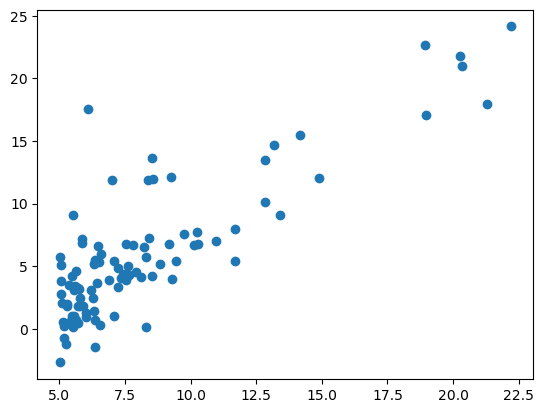

In [3]:
plt.scatter(X, y)
#plt.xlabel("Population of the City in 10,000")
#plt.ylabel("Profit in $10,000s")
plt.show()

# Adding the intercept term

In [4]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

C:\Users\klikh\AppData\Local\Temp\ipykernel_12768\351318876.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
C:\Users\klikh\AppData\Local\Temp\ipykernel_12768\351318876.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [5]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Computing the cost

In [6]:
#computing cost
def computeCost(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)


In [7]:
J=computeCost(X,y,theta)
print(J)

32.072733877455676


# Finding the optimal parameters using Gradient Descent

In [8]:
#compoute gradient descetn
def gradientDescentUnivariate(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=np.dot(X.transpose(),(y_pred-y))
        descent=alpha*1/m *error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history
theta,J_history=gradientDescentUnivariate(X,y,theta,alpha,iterations)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"X1")

h(x) = -3.63 + 1.17X1


In [9]:
#checking the cost values with new theta values
J=computeCost(X,y,theta)
print(J)

4.483388256587725


In [10]:
#we already have a vector of all the cost values throught the history
print(J_history[-1])

4.483388256587725


# 3D diagram for a univariate linear regression
the cost function is a convex function

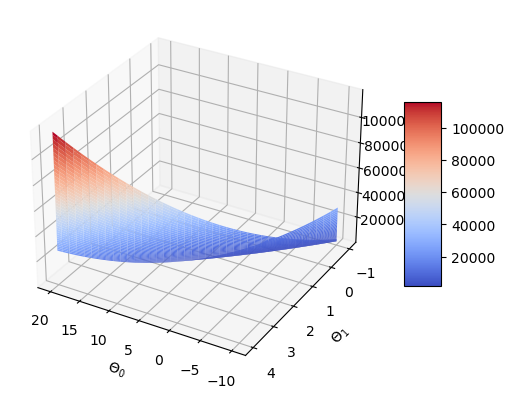

In [11]:
#3d diagram for genrating new theta values and corresponding cost values
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,20,120)
theta1_vals=np.linspace(-1,4,120)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

# Cost function observation w.r.t number of iteration

Text(0.5, 1.0, 'cost func using  GD ')

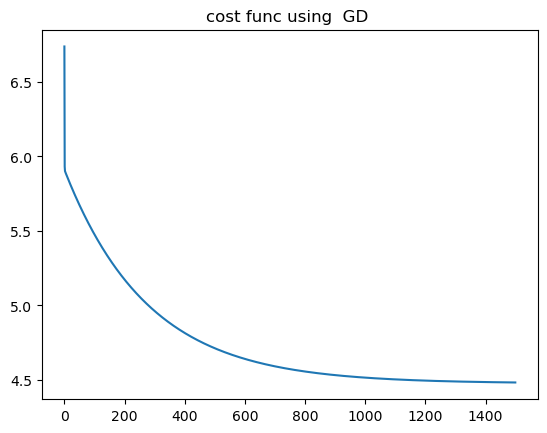

In [12]:
plt.plot(J_history)
plt.title("cost func using  GD ")

Plotting the cost function against the number of iterations gave a nice descending trend, indicating that the gradient descent implementation works in reducing the cost function

# Plot showing the best fit line

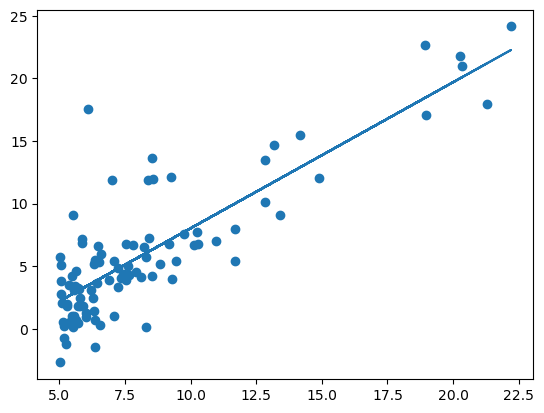

In [13]:
# plot to show the best fit line
plt.scatter(X[:,1],y)
plt.xlabel=("populaions of the city in 10000s")
plt.ylabel=("profit in $10000s")
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

# make prediction


In [14]:
#prediction funciton
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = {} we predict profit = ${}".format(3500,int(predict1)))

For population = 3500 we predict profit = $4519


# linear regression with multiple variable

Problem context:

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.

The file ex1data2.txt((available under week 2’s assignment material)) contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

You already have the necessary infrastructure which we built in our previous section that can be easily applied to this section as well. Here we will just use the equations which we made in the above section.


In [15]:
import numpy as np
import pandas as pd
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Ploting the data values


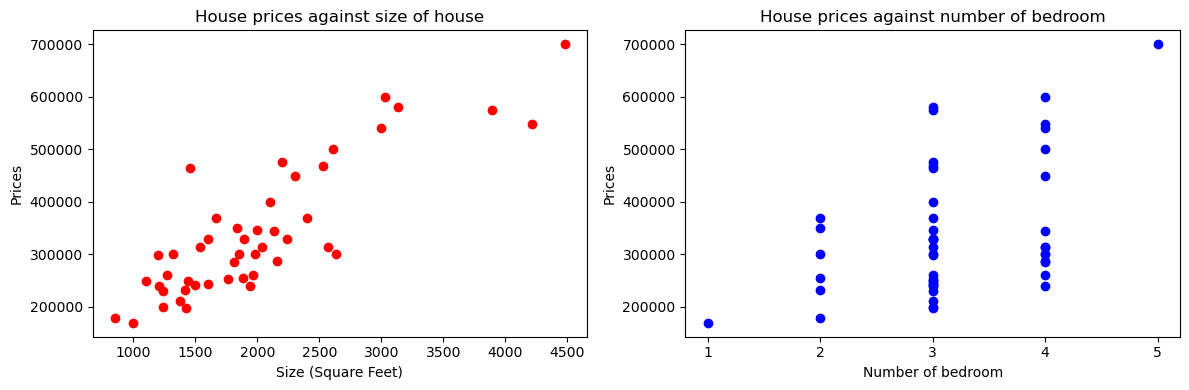

In [16]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data[0],data[2],color="red")
axes[1].scatter(data[1],data[2],color="blue")

axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")

axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

In [17]:
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples

In [18]:
X.head()

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


# Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to:

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [19]:
#feature normalisation function
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [20]:
X=featureNorm(X)

C:\Users\klikh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# adding the intercept term


In [21]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.1
iterations = 200
theta = np.zeros((3,1))
y = y[:,np.newaxis]

C:\Users\klikh\AppData\Local\Temp\ipykernel_12768\3461389228.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [22]:
#computing cost
def computeCostMultiVariate(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)
J=computeCostMultiVariate(X,y,theta)
print(" Cost = ",J)

 Cost =  65591548106.45744


# Optimal parameter by gradient descent algorithm

In [23]:
def gradientDescentMulti(X,y,theta,alpha,iterations):
    m=len(y)
    Jh_multi_linear=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=(y_pred-y)
        descent=np.dot(X.transpose(),error)
        theta-=(1/m) *alpha *descent
        Jh_multi_linear.append(computeCostMultiVariate(X,y,theta))
        
    return theta,Jh_multi_linear

theta, Jh_multi_linear=gradientDescentMulti(X,y,theta,alpha,iterations)

In [24]:
print(theta)
print("optimum cost valu is : ",Jh_multi_linear[-1])  #prints the last cost value
print("The optimum hypothesis is : h(x) =" + str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2)) + "x1"+str(round(theta[2,0],2))+"x2")

[[340412.6593343 ]
 [109440.63822766]
 [ -6571.19661218]]
optimum cost valu is :  2043280073.1502974
The optimum hypothesis is : h(x) =340412.66 + 109440.64x1-6571.2x2


these are the optimum theta values


In [25]:
#lets see the final cost over iterations
J=computeCostMultiVariate(X,y,theta)
print(J)

2043280073.1502974


## ploting the cost function w.r.t #iterations

Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

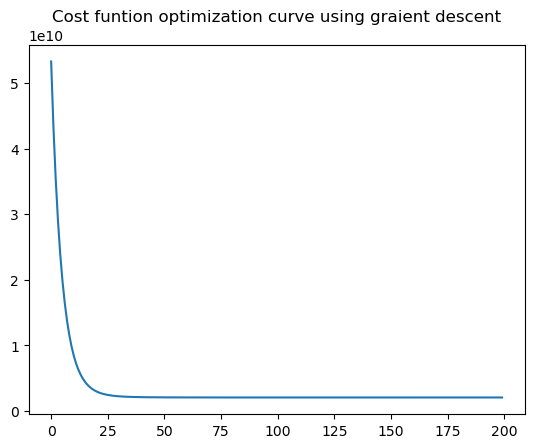

In [26]:
#plot the cost function vs iterations grap
plt.plot(Jh_multi_linear)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

In [27]:
#make predictions
def predict_house_price(feature,theta):
    y_pred=np.dot(theta.transpose(),feature)
    return y_pred
#feature normalisation of x values
x_sample = featureNorm(np.array([1650,3]))
x_sample=np.append(np.ones(1),x_sample)
predicted_price=predict_house_price(x_sample,theta)
print("Cost for new house having size 1650 and 3 bedrooms: ",predicted_price[0])
#print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

Cost for new house having size 1650 and 3 bedrooms:  456424.49417414423


# Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

### Problem context

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("ex2data1.txt",header=None)

In [29]:
data=pd.read_csv("ex2data1.txt",header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [30]:
X=data.iloc[:,:2]
y=data.iloc[:,2]
X.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


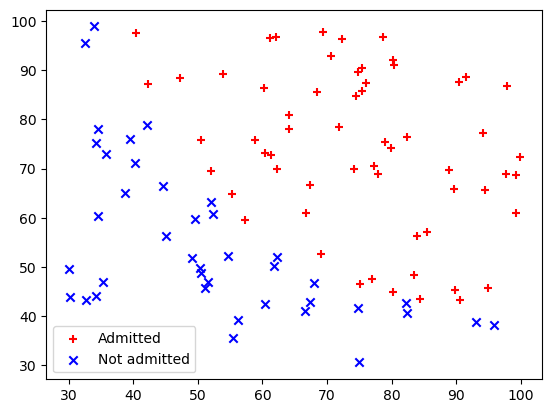

In [31]:
res=y==1
adm=plt.scatter(X[res][0].values,X[res][1].values,c="r",marker="+")
not_adm = plt.scatter(X[~res][0].values, X[~res][1].values,c="b",marker="x")
#plt.xlabel("Exam 1 score")
#plt.ylabel("Exam 2 score")
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))

# Sigmoid function
The hypothesis function that we have used in linear regression can't be used in logistic regression. Because that function may return values that are greater than one.In other words continuous values while we need catagorical result in logistic regression. Moreover, that function is not convex function. Thats why we take help from sigmoid function. Before move to further, lets implement the sigmoid function first

In [32]:
def sigmoid(x):
      return 1/(1+np.exp(-x))


# Cost Function

In [33]:
def cf_logistic(X,y,theta):
    m=len(y)
    z=np.dot(X,theta)
    y_pred=sigmoid(z)
    error=(-y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
    cost=(1/m)*np.sum(error)
    grad=(1/m)*np.dot(X.transpose(),(y_pred-y))
    return cost,grad

### Setting initial parameter and test cost function


In [34]:
m,n=X.shape[0],X.shape[1]
X=np.append(np.ones((m,1)),X,axis=1)
y=y.values.reshape(m,1)
initial_theta=np.zeros((n+1,1))
cost,grad=cf_logistic(X,y,initial_theta)
print("cost for initial theta is : ", cost)
print("grad at initial theta is : ",grad)
print("initial theta is : ",initial_theta)

cost for initial theta is :  0.6931471805599453
grad at initial theta is :  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
initial theta is :  [[0.]
 [0.]
 [0.]]


In [35]:
print("Unnormalized form of X : ", X[:5,])

Unnormalized form of X :  [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


#### Before doing gradient descent algorithm we need to perform feature normalization

In [36]:
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [37]:
X=featureNorm(X)

In [38]:
#after normalization lets have a look on the data
print("Normalized X : ",X[:5,])

Normalized X :  [[-1.26237152 -0.28185018  0.98379548]
 [-1.26237152 -0.40832276 -0.01148269]
 [-1.26237152 -0.24616364  0.83441509]
 [-1.26237152  0.46349063  1.22536647]
 [-1.26237152  1.01319169  0.90563304]]


In [39]:
num_iter=1000
alpha=.5

As mentioned in the lecture, the gradient descent algorithm is very similar to linear regression. The only difference is that the hypothesis h(x) is now g(Θ^Tx) where g is the sigmoid function.

In [40]:
def gD_logistic(X,y,theta,alpha,num_iter):
    m=len(y)
    Jh_logistic=[]
    for i in range(num_iter):
        cost,grad=cf_logistic(X,y,theta)
        theta=theta-(alpha*grad)
        Jh_logistic.append(cost)
    return theta, Jh_logistic
    

In [41]:
optimized_theta,Jh_logistic=gD_logistic(X,y,initial_theta,alpha,num_iter)
print(optimized_theta)

[[4.48213443]
 [5.69132904]
 [5.50895331]]


In [42]:
print(Jh_logistic[-1])

0.20806000435638866


Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

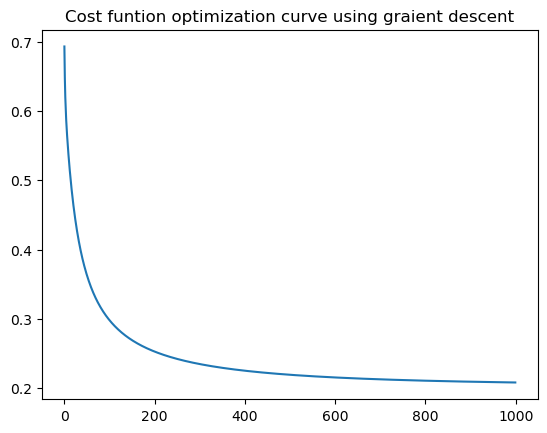

In [43]:
#plot the cost function vs iterations grap
plt.plot(Jh_logistic)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

 I tried different number of iterations and learning rate for this task. but so far this is the least when alpha=.5 and iterations =1000. and in the above curve we can see that error is plateau at 1000 iterations

# Ploting the decision boundary using optimized theta

In [44]:
print(optimized_theta)

[[4.48213443]
 [5.69132904]
 [5.50895331]]


In [45]:
print(optimized_theta.shape)

(3, 1)


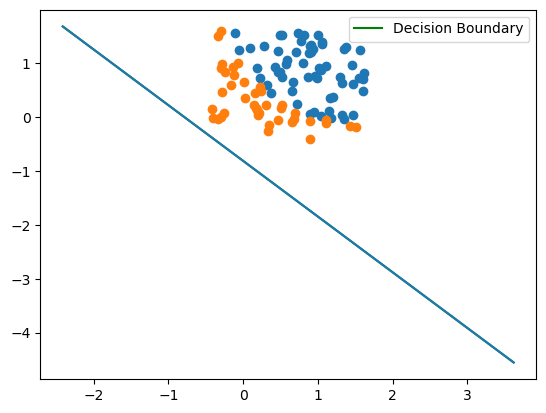

In [46]:

# Plot the decision boundary
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_y = (-1 / optimized_theta[2]) * (optimized_theta[1] * plot_x + optimized_theta[0])
plt.plot(plot_x, plot_y, c="g", label="Decision Boundary")


mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
# Set labels and legend
plt.legend()



# Accuracy 
lets check how our model is to predict

In [47]:
def lr_accuracy(X,y,theta,cutoff):
    pred=[sigmoid(np.dot(X,theta))>=cutoff]
    ac=np.mean(pred==y)
    print(ac*100,"%")
lr_accuracy(X,y,optimized_theta,.5)

89.0 %


89 percent is not that model. However we should do further work to increase 

# Predictions
lets predict for an unknown value

In [48]:
x_test = np.array([60,70])
x_test = np.append(np.ones(1),x_test)
x_test = featureNorm(x_test)
prob = sigmoid(x_test.dot(optimized_theta))
print("Student with scores 60 and 70, model predict an admission probability of",prob[0])

Student with scores 60 and 70, model predict an admission probability of 0.8230090915004592


## Regularized Logistic regression
You will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

# Import necessary library

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    # more on this later

In [50]:
data = pd.read_csv('ex2data2.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [51]:
print(data.shape)
print(X.shape)
print(y.shape)
print(X[:1])

(118, 3)
(118, 2)
(118,)
          0        1
0  0.051267  0.69956


# Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

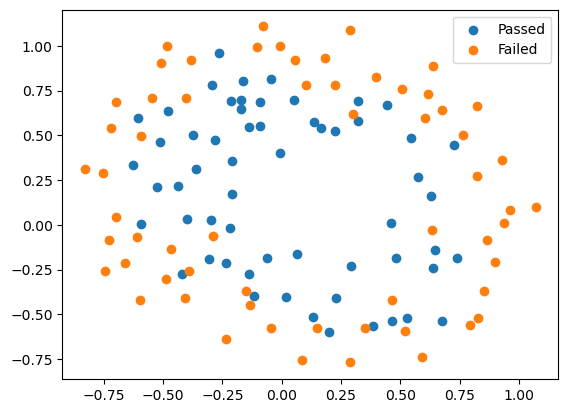

In [52]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

Plotting the data clearly shows that the decision boundary that separates the different classes is a non-linear one. This lead to the next step of feature mapping, where we add additional polynomial terms to try and better fit the data

# Feature Mapping and Adding intercept term
Refers to add more feature from the existing features.While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to over fitting

In [53]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),                                     np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

C:\Users\klikh\AppData\Local\Temp\ipykernel_12768\3686194652.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out = np.hstack((out, np.multiply(np.power(X1, i-j),                                     np.power(X2, j))[:,np.newaxis]))


# sigmoid

In [54]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Cost Funtion


In [55]:
# def cf_logisticR(X,y,theta,lam):
#     m=len(y)
#     y=y[:,np.newaxis]
#     z=np.dot(X,theta)
#     y_pred=sigmoid(z)
#     error = (-y * np.log( y_pred)) - ((1-y)*np.log(1- y_pred))
#     cost=(1/m)*np.sum(error)
#     regCost=cost+lam/(2*m)*np.sum(theta**2)
#     # compute gradient
#     grad=np.zeros((m,1))
#     grad=(1/m)*np.dot(X.transpose(),error)
#     grad[1:]=grad[1:]+(lam/m)*theta[1:]
#     return regCost,grad  
    
    
def costFunctionReg(theta, X, y ,Lambda):
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)

    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad


In [56]:
print(X[:1])

[[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
  3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
  2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
  1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
  4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
  1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
  4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]]


# setting initial parameters and check the cost function


In [57]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 1

#initial theta
print("initial theta",theta[:3])
#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)

initial theta [[340412.6593343 ]
 [109440.63822766]
 [ -6571.19661218]]
Cost at initial theta (zeros): 0.6931471805599461


C:\Users\klikh\AppData\Local\Temp\ipykernel_12768\3419122384.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y=y[:,np.newaxis]


In [58]:
print("final X, y",X[:1],y[:1])
print("\n\n shape:",X.shape,y.shape)

final X, y [[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
  3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
  2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
  1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
  4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
  1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
  4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]] 0    1
Name: 2, dtype: int64


 shape: (118, 28) (118,)


In [59]:
print(J)

2043280073.1502974


In [60]:
print("initial grad",grad[:4])

initial grad [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]]


In [61]:
print("final X, y\n",X[:1],y[:1])
print("\n\n shape:",X.shape,y.shape)

final X, y
 [[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
  3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
  2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
  1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
  4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
  1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
  4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]] 0    1
Name: 2, dtype: int64


 shape: (118, 28) (118,)


#  Gradient Descent Alogrithm
mimizes cost function by fitting parameters thetas

In [62]:
num_iters=800
alpha=.2

In [63]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history
theta , J_history = gradientDescent(X,y,initial_theta,1,num_iters,0.2)
print("The regularized theta using ridge regression:\n",theta)

C:\Users\klikh\AppData\Local\Temp\ipykernel_12768\3419122384.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y=y[:,np.newaxis]


The regularized theta using ridge regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


# ploting the cost function w.r.t number of iterations


Text(0.5, 1.0, 'Cost function using Gradient Descent')

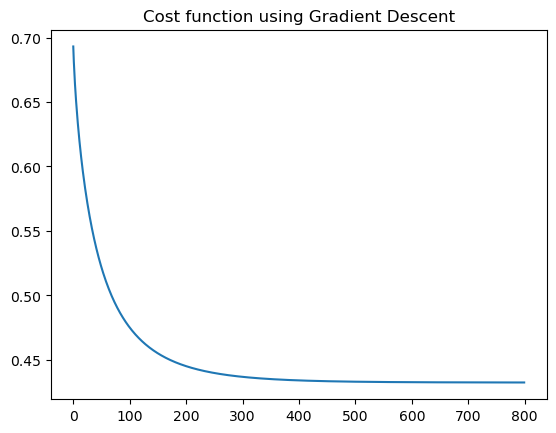

In [64]:
plt.plot(J_history)
plt.title("Cost function using Gradient Descent")

# Checking decrease of cost function

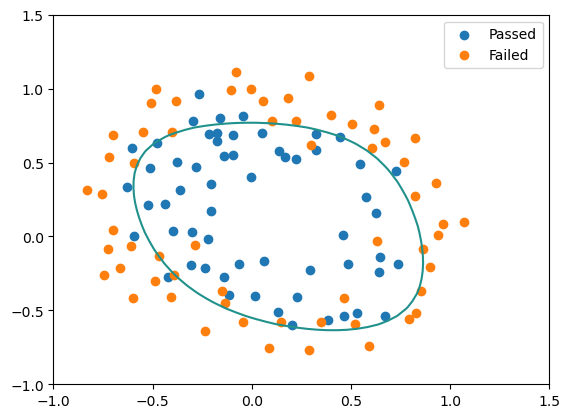

In [65]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.values.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [66]:
# def classifierPredict(theta,X):
#     """
#     take in numpy array of theta and X and predict the class 
#     """
#     predictions = X.dot(theta)
    
#     return predictions>0
# p=classifierPredict(theta,X)
# print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

# Digit recognition using logistic regression
This series of exercise make use of a handwritten digits dataset that consists of 5000 training examples, where each example is a 20 pixel by 20 pixel grayscale image of the digit.
# Understanding One-vs-all Classification
If there are K different classes in a data-set, we will first build a model where we consider the data belonging to one class as positive, and all other classes as negative. Next, we will build another model assuming the data belonging to some other class as positive and the remaining as negative. We shall keep repeating the process until we build K different models.

Let us understand this better with the help of an example. In the below figure, we have data belonging to 3 different classes. Hence we will build 3 different models considering one particular class of data as positive and the remaining as negative.


In general, if there are K classes in the data-set, we need to build K different models.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
# Use loadmat to load matlab files
data=loadmat("ex3data1.mat")
X=data["X"]
y=data["y"]

In [68]:
X.shape, y.shape

((5000, 400), (5000, 1))

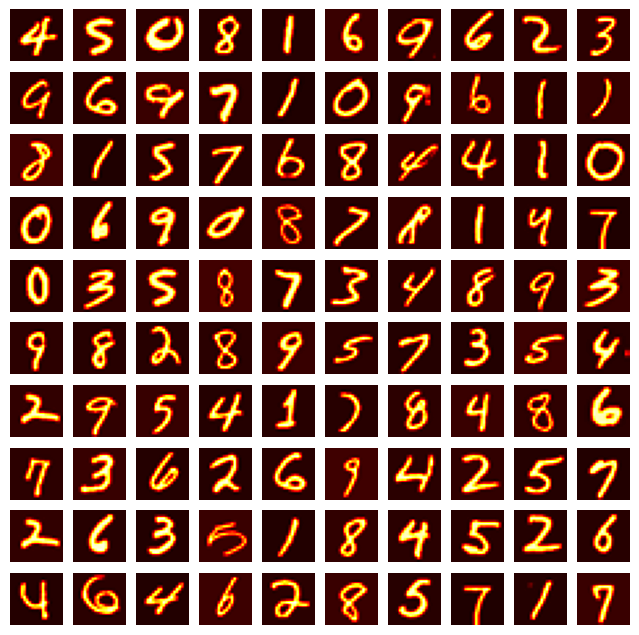

In [69]:
#visualising the data
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

The code block above construct 100 subplots and randomly visualize 100 out of the 5000 training examples using plt.imshow. Take note we have to reshape the training example back to 20 X 20 pixel before we can visualize it and adding order="F" as a parameter into the reshape function ensure that the orientation of the image is upright.

In [70]:
# ## Adding the intercept term'
# m = len(y)
# ones = np.ones((m,1))
# X = np.hstack((ones, X)) #add the intercept
# (m,n) = X.shape

# Vectorization

According to Andrew Ng, “Vectorization is the art of getting rid of explicit for-loops in code”. We as data scientists work with huge amounts of data. Using for-loops while working on such huge data is highly inefficient. Hence, we make use of the vectorization technique which avoids the use of for-loops and also improves efficiency and speed of calculations.

For example, let’s consider two 1-d arrays - a and b having a million elements each. To demonstrate the speed at which Vectorization vs for-loops operate, we perform element wise multiplication of both the arrays and sum the elements in resulting array and compare the time difference.

In [71]:
import numpy as np
import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using for-loop " + str(1000*(toc-tic)) + " ms")
c = 0
tic = time.time()
c = np.dot(a,b) # no for-loops in vectorized version
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using vectorized operation " + str(1000*(toc-tic)) + " ms")

value of c 250189.75998
time taken using for-loop 411.42964363098145 ms
value of c 250189.75998
time taken using vectorized operation 0.0 ms


# Vectorized logistic regression and cost function

In [72]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

def lrCostFunction(theta, X, y, Lambda):
    m=len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [73]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = lrCostFunction(theta_t, X_t, y_t, 3)
Lambda=1
num_iters=400
alpha=.1
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [74]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = lrCostFunction(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history



In [75]:
optimized_theta,J_history=gradientDescent(X_t,y_t,theta_t,alpha,num_iters,Lambda)
print(optimized_theta)

[[0.06422841]
 [0.02683551]
 [0.08689855]
 [0.14665224]]


In [76]:
def oneVsAll(X, y, num_labels, Lambda):
    m, n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J=[]
    # add intercept terms
    
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1,num_labels+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [77]:
all_theta, all_J = oneVsAll(X, y, 10, 0.1)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

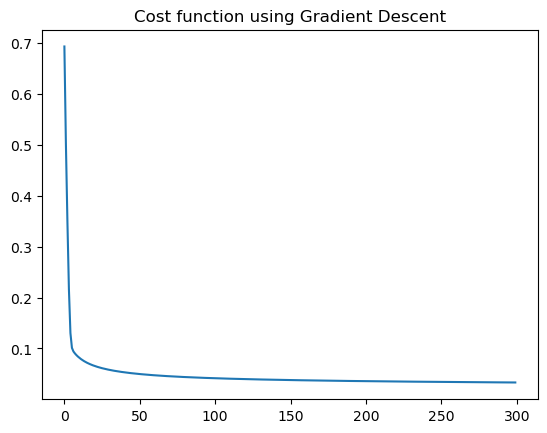

In [78]:
plt.plot(all_J[0:300])
# plt.xlabel("Iteration")
# plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

# prediction

In order to make a prediction, the probability of x(i) for each class was computed and the prediction is the class with the highest probability

In [79]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = X @ all_theta.T
    return np.argmax(predictions,axis=1)+1

In [80]:
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 91.46 %


# Neural Network
Finally, time for neural networks. With the same dataset, we aimed to achieve higher accuracy using a more complex algorithm such as the neural network. For the first part of the exercise, the optimized theta values were given to us and we are supposed to implement feedforward propagation to obtain the prediction and model accuracy.

In [81]:
mat2=loadmat("ex3weights.mat")
Theta1=mat2["Theta1"] # Theta1 has size 25 x 401
Theta2=mat2["Theta2"] # Theta2 has size 10 x 26

In [82]:
Theta1.shape,Theta2.shape

((25, 401), (10, 26))

In [83]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    return np.argmax(a2,axis=1)+1

In [84]:
pred2 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 97.52 %


# Neural Network from scratch


In [85]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid)
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):
    """
    nn_params contains the parameters unrolled into a vector
    
    compute the cost and gradient of the neural network
    """
    # Reshape nn_params back into the parameters Theta1 and Theta2
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J=0
    X = np.hstack((np.ones((m,1)),X))
    y10 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y10[:,j] * np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost = 1/m* J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    for i in range(m):
        xi= X[i,:] # 1 X 401
        a1i = a1[i,:] # 1 X 26
        a2i =a2[i,:] # 1 X 10
        d2 = a2i - y10[i,:]
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T)))
        grad1= grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg

In [86]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid) 

In [87]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.append(Theta1.flatten(),Theta2.flatten())
J,reg_J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)[0:4:3]
print("Cost at parameters (non-regularized):",J,"\nCost at parameters (Regularized):",reg_J)

Cost at parameters (non-regularized): 0.2876291651613188 
Cost at parameters (Regularized): 0.38376985909092354


# Random Initialization


In [88]:
def randInitializeWeights(L_in, L_out):
    """
    randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections.
    """
    
    epi = (6**1/2) / (L_in + L_out)**1/2
    
    W = np.random.rand(L_out,L_in +1) *(2*epi) -epi
    
    return W

In [89]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.append(initial_Theta1.flatten(),initial_Theta2.flatten())

In [90]:
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 3)
print("Cost at (fixed) debugging parameters (w/ lambda = 3):",debug_J[3])

Cost at (fixed) debugging parameters (w/ lambda = 3): 0.576051246950133


Learning parameters using Gradient Descent

In [91]:
def gradientDescentnn(X,y,initial_nn_params,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    Theta1 = initial_nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        nn_params = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda)[3:]
        Theta1 = Theta1 - (alpha * grad1)
        Theta2 = Theta2 - (alpha * grad2)
        J_history.append(cost)
    
    nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal , J_history

In [93]:
nnTheta, nnJ_history = gradientDescentnn(X,y,initial_nn_params,0.8,800,1,input_layer_size, hidden_layer_size, num_labels)
Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

In [ ]:
pred3 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred3[:,np.newaxis]==y)[0]/5000*100,"%")